# SVM LAB

In [1]:
import numpy as np

In [2]:
n_cls = 20 # Number of samples in each class.
np.random.seed(1) # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2) # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3) # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4) # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
X = np.vstack((
np.hstack((x11, x12)),
np.hstack((x21, x22))
))
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))


### Train SVM classifier

In [3]:
from  sklearn import svm

In [4]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

### Plot the result 

In [5]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'x2')

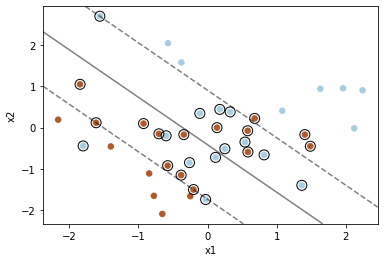

In [6]:
fig = plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')

array([-1.,  1.])

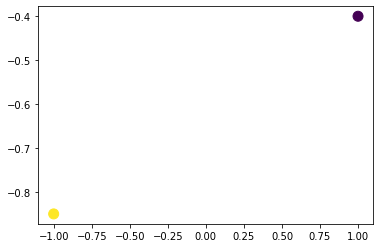

In [7]:
X_new = np.array([
[1, -0.4],
[-1, -0.85],
])
y_new = clf.predict(X_new)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()
y_new

## Exercise 2 SVM spam classifier¶


In [8]:
import csv

from typing import Dict


def get_vocabulary_dict() -> Dict[int, str]:
    """Read the fixed vocabulary list from the datafile and return.

    :return: a dictionary of words mapped to their indexes
    """
    FILEPATH = './data/vocab.txt'
    vocab_dict = dict()
    with open(FILEPATH, 'r') as tsvfile:
        csv_reader = csv.reader(tsvfile, delimiter='\t')
        for row in csv_reader:
            vocab_dict.update({int(row[0]): row[1]})
    return vocab_dict



In [9]:
email_contents = "hello anna@gmail.com I am 16 right now and have 1000$ in cash"

In [12]:
import re

re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', 'emailaddr', email_contents)


'hello emailaddr I am 16 right now and have 1000$ in cash'

In [13]:
import re
from typing import List

from nltk import PorterStemmer

# from get_vocabulary_dict import get_vocabulary_dict


def process_email(email_contents: str) -> List[int]:
    """Pre-process the body of an email and return a list of indices of the
    words contained in the email.

    :param email_contents: the body of an email
    :return: a list of indices of the words contained in the email
    """

    # Load the vocabulary.
    vocabulary_dict = get_vocabulary_dict()

    # Initialize the return value.
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    header_token = '\n\n'
    header_start = email_contents.find(header_token)
    email_contents = email_contents[header_start+len(header_token):]

    # FIXME: Convert email content to lower case.
    email_contents = email_contents

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)

    #  Handle numbers.
    # Convert all sequences of digits (0-9) to a 'number' token.
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Handle URLs.
    # Convert all strings starting with http:// or https:// to a 'httpaddr' token.
    email_contents = re.sub('^http://|^https://', 'httpaddr', email_contents)

    # Handle email addresses.
    # Convert all strings with @ in the middle to a 'emailaddr' token.
    email_contents = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', 'emailaddr', email_contents)

    # Handle $ sign
    # Convert all sequences of $ signs to a 'dollar' token.
    email_contents = re.sub('[$]', 'dollar', email_contents)

    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    print('\n==== Processed Email ====\n\n')

    # Process file
    col = 0

    # Tokenize and also get rid of any punctuation
    tokens = re.split('[ @$/#.-:&*\+=\[\]?!\(\)\{\},''">_<;#\n\r]', email_contents)

    for token in tokens:

        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Stem the word 
        token = PorterStemmer().stem(token.strip())

        # Skip the word if it is too short
        if len(token) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if
        # found
        # ======================= YOUR CODE HERE ======================
  
        for (key, value) in vocabulary_dict.items():
            if value == token:
                word_indices.append(key)

        # ========================= END OF YOUR CODE ==========================

        # Print to screen, ensuring that the output lines are not too long
        if (col + len(token) + 1) > 78:
            print('')
            col = 0
        print('{} '.format(token), end='', flush=True)
        col = col + len(tokens) + 1

    # Print footer
    print('\n\n=========================\n')

    return word_indices


In [14]:
from typing import List

import numpy as np


def email_features(word_indices: List[int]) -> np.ndarray:
    """Convert a list of word IDs into a feature vector.

    :param word_indices: a list of word IDs
    :return: a feature vector from the word indices (a row vector)
    """

    # Total number of words in the dictionary
    n_words = 1899    
    x = np.zeros(n_words)
    for idx in word_indices:
      x[idx]=1  

    return x


In [15]:
import numpy as np
from sklearn import svm
from sklearn.metrics import  accuracy_score


def read_file(file_path: str) -> str:
  """Return the content of the text file under the given path.

  :param file_path: path to the file
  :return: file content
  """
  with open(file_path) as f:
    return f.read().replace('\n', '')

# %% ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in process_email.py to produce a word indices vector
#  for a given email.

print('\nPreprocessing sample email (emailSample1.txt)\n')

file_contents = read_file('data/emailSample1.txt')
word_indices = process_email(file_contents)

# Print Stats
print('Word Indices: \n')
print(word_indices)
print('\n\n')

# input('Program paused. Press enter to continue.\n')



Preprocessing sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much it 
cost to 
host a 
web 
portal 
well it 
depend on 
how 
mani 
visitor 
your 
expect 
thi 
can be 
anywher 
from 
less 
than 
number 
buck a 
month to 
a 
coupl of 
dollarnumb 
you 
should 
checkout 
http 
www 
rackspac 
com or 
perhap 
amazon 
ecnumb if 
your 
run 
someth 
big To 
unsubscrib 
yourself 
from 
thi 
mail 
list 
send an 
email to 
emailaddr 


Word Indices: 

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 798, 1882, 309, 1182, 1237, 810, 1895, 1440, 1547, 181, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]





In [16]:

# %% ==================== Part 2: Feature Extraction ====================
#  Now, you will convert each email into a vector of features in R^n. 
#  You should complete the code in email_features.py to produce a feature
#  vector for a given email.

print('\nExtracting features from sample email (emailSample1.txt)\n')

# Extract Features
file_contents = read_file('data/emailSample1.txt')
word_indices = process_email(file_contents)
features = email_features(word_indices)

# Print Stats
print('Length of feature vector: {}\n'.format(len(features)))
print('Number of non-zero entries: {}\n'.format(sum(features > 0)))

# input('Program paused. Press enter to continue.\n')





Extracting features from sample email (emailSample1.txt)


==== Processed Email ====


anyon 
know 
how 
much it 
cost to 
host a 
web 
portal 
well it 
depend on 
how 
mani 
visitor 
your 
expect 
thi 
can be 
anywher 
from 
less 
than 
number 
buck a 
month to 
a 
coupl of 
dollarnumb 
you 
should 
checkout 
http 
www 
rackspac 
com or 
perhap 
amazon 
ecnumb if 
your 
run 
someth 
big To 
unsubscrib 
yourself 
from 
thi 
mail 
list 
send an 
email to 
emailaddr 


Length of feature vector: 1899

Number of non-zero entries: 46



In [17]:
# %% =========== Part 3: Train Linear SVM for Spam Classification ========
#  In this section, you will train a linear classifier to determine if an
#  email is Spam or Not-Spam.

# Load the Spam Email dataset
# You will have X, y in your environment

print('\nLoading the training dataset...')
X_train = np.genfromtxt('data/spamTrain_X.csv', delimiter=',')
y_train = np.genfromtxt('data/spamTrain_y.csv', delimiter=',')
print('The training dataset was loaded.')

print('\nTraining Linear SVM (Spam Classification)\n')
print('(this may take 1 to 2 minutes) ...\n')

# Create a linear SVC classifier (with C = 0.1).
clf = svm.SVC(kernel='linear', C=0.1) #svm.SVC(kernel='linear', C=0.1, random_state=1, probability=True)

# Fit the SVC model using the training data.
clf.fit(X_train, y_train)

#  Predict the labelling.
y_pred = clf.predict(X_train)

#  Compute the training accuracy.
acc_train = accuracy_score(y_train, y_pred)
print('Training Accuracy: {:.2f}%\n'.format(acc_train * 100))



Loading the training dataset...
The training dataset was loaded.

Training Linear SVM (Spam Classification)

(this may take 1 to 2 minutes) ...

Training Accuracy: 99.83%



In [18]:
# %% =================== Part 4: Test Spam Classification ================
#  After training the classifier, we can evaluate it on a test set.

# Load the test dataset ('data/spamTest_X.csv', 'data/spamTest_y.csv').
# You will have Xtest, ytest in your environment
X_test = np.genfromtxt('data/spamTrain_X.csv', delimiter=',')
y_test = np.genfromtxt('data/spamTrain_y.csv', delimiter=',')

print('\nEvaluating the trained Linear SVM on a test set ...\n')

# Predict the labelling.
y_pred = clf.predict(X_test) 

#  Compute the training accuracy.
acc_test = accuracy_score(y_test, y_pred)
print('Test Accuracy: {:.2f}%\n'.format(acc_test * 100))

# input('Program paused. Press enter to continue.\n')



Evaluating the trained Linear SVM on a test set ...

Test Accuracy: 99.83%



In [19]:
# %% ================= Part 5: Top Predictors of Spam ====================
#  Since the model we are training is a linear SVM, we can inspect the
#  weights learned by the model to understand better how it is determining
#  whether an email is spam or not. The following code finds the words with
#  the highest weights in the classifier. Informally, the classifier
#  'thinks' that these words are the most likely indicators of spam.

# FIXME: Print the list of 15 most prominent features.
# (i.e. words which gives strongest evidence for an email being a spam)
# - Obtain the weights of the SVC model.
# - Obtain the indices that would sort the weights in the descending order.
# - Obtain the vocabulary.

weights = clf.coef_
idx = np.flip(np.argsort(weights))
idx = idx.astype(int)


vocabulary_dict = get_vocabulary_dict()

print('\nTop predictors of spam: \n')
for i in range(15):
    # Replace each `None` with an appropriate expression.
    word = list(vocabulary_dict.values())[idx[0,i]]
    weigth = weights[0,i]
    print(' {word:<20}: {weight:10.6f}'.format(
        word=word, weight=weigth))

print('\n\n')
# input('\nProgram paused. Press enter to continue.\n')



Top predictors of spam: 

 our                 :   0.007932
 click               :   0.015633
 remov               :   0.055465
 guarante            :  -0.013416
 visit               :  -0.066198
 basenumb            :   0.036595
 dollar              :   0.183376
 will                :  -0.024886
 price               :  -0.021608
 pleas               :   0.020790
 most                :   0.141262
 nbsp                :  -0.017696
 lo                  :   0.021931
 ga                  :   0.001519
 hour                :  -0.014966





In [20]:
# %% =================== Part 6: Try Your Own Emails =====================
#  Now that you've trained the spam classifier, you can use it on your own
#  emails! In the starter code, we have included spamSample1.txt,
#  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
#  The following code reads in one of these emails and then uses your 
#  learned SVM classifier to determine whether the email is Spam or 
#  Not Spam

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filename = 'data/spamSample1.txt'

# Read and predict
file_contents = read_file(filename)
word_indices = process_email(file_contents)
x = email_features(word_indices)
#  Predict the labelling.
y_pred = clf.predict([x])

print('\nProcessed {}\n\nSpam Classification: {}\n'.format(filename, y_pred[0] > 0))
print('(1 indicates spam, 0 indicates not spam)\n\n')



==== Processed Email ====


o 
you 
want 
To 
make 
dollarnumb 
Or 
more 
per 
week 
If 
you 
are 
a 
motiv 
and 
qualifi 
individu 
I 
will 
person 
demonstr 
to 
you 
a 
system 
that 
will 
make 
you 
dollarnumb 
number 
per 
week 
or 
more 
thi 
is 
not 
mlm 
call 
our 
number 
hour 
prerecord 
number 
to 
get 
the 
detail 
numbernumbernumb 
I 
need 
peopl 
who 
want 
to 
make 
seriou 
money 
make 
the 
call 
and 
get 
the 
fact 
invest 
number 
minut 
in 
yourself 
now 
numbernumbernumb 
look 
forward 
to 
your 
call 
and 
I 
will 
introduc 
you 
to 
peopl 
like 
yourself 
whoar 
current 
make 
dollarnumb 
number 
plu 
per 
week 
numbernumbernumberljgvnumbernumberleannumberlrmsnumbernumberwxhonumberqiytnumbernumberrjuvnumberhqcfnumbernumbereidbnumberdmtvlnumb 



Processed data/spamSample1.txt

Spam Classification: True

(1 indicates spam, 0 indicates not spam)




In [21]:

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filename = 'data/spamSample2.txt'

# Read and predict
file_contents = read_file(filename)
word_indices = process_email(file_contents)
x = email_features(word_indices)
#  Predict the labelling.
y_pred = clf.predict([x])

print('\nProcessed {}\n\nSpam Classification: {}\n'.format(filename, y_pred[0] > 0))
print('(1 indicates spam, 0 indicates not spam)\n\n')



==== Processed Email ====


est buy 
viagra gener 
onlineviagra numbermg 
x number 
pill dollarnumb 
free pill 
reorder discount 
top sell 
number qualiti 
satisfact guarante 
We accept 
visa master 
echeck payment 
number satisfi 
custom http 
medphysitcstech ru 



Processed data/spamSample2.txt

Spam Classification: True

(1 indicates spam, 0 indicates not spam)


